# Data Visualization with Seaborn
Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd 
from datetime import datetime
import ssl

In [3]:
df = pd.read_csv('data/tips.csv')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


## Displot

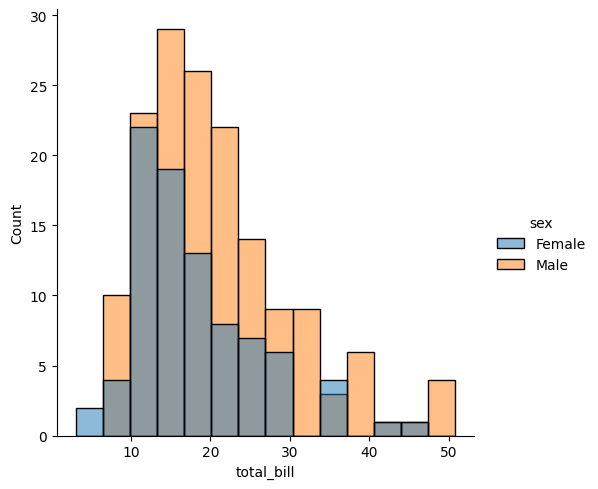

In [4]:
sns.displot(data=df, x = 'total_bill', hue = 'sex')

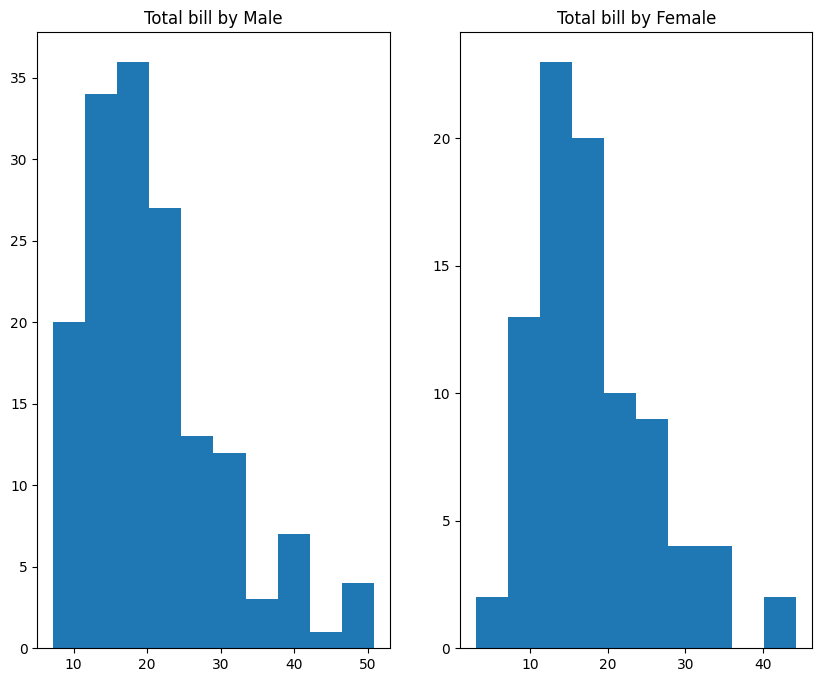

In [5]:
#Can seperate into female and male
df_male = df[df['sex'] == 'Male']
df_female = df[df['sex'] == 'Female']
fig,(ax1,ax2)= plt.subplots(1,2,figsize = (10,8))
ax1.hist(data = df_male, x = 'total_bill')
ax1.set_title('Total bill by Male')
ax2.hist(data = df_female, x = 'total_bill')
ax2.set_title('Total bill by Female')
plt.show()

<Axes: xlabel='total_bill', ylabel='Density'>

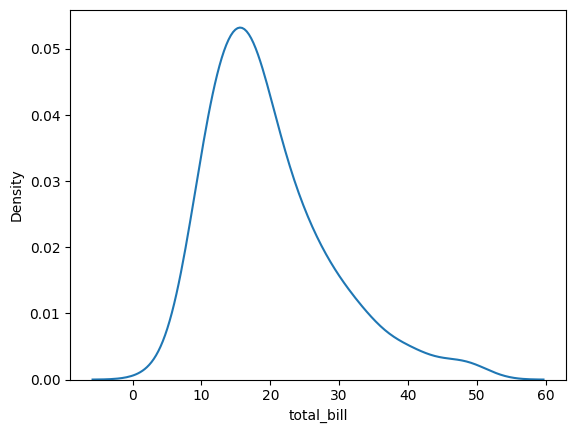

In [6]:
#Can use agurment kind = 'kde' or use directly kdeplot to draw historgram
sns.kdeplot(data=df,x = 'total_bill')

## Box plot

Text(0.5, 1.0, 'Total bill devided by sex')

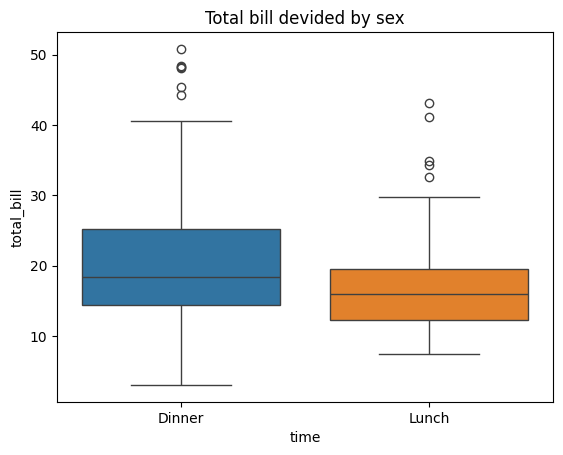

In [7]:
sns.boxplot(data=df,x='time',y='total_bill', hue = 'time').set_title('Total bill devided by sex')

# Read and data visualization for DJIA data

In [16]:
djia = pd.read_csv('data/djia.csv')

#delete sapce of columns name
djia.columns = djia.columns.str.replace(' ','')

#change date column to datetime type
djia['Date'] = pd.to_datetime(djia['Date'])

#add Month name
djia['Month'] = djia['Date'].dt.month_name()

#add Month number
djia['Month_num'] = djia['Date'].dt.month

#sort data by Month_num
djia.sort_values(by= 'Month_num',inplace=True)

/var/folders/nq/2kwnsz3s0_n7jq2trb91l5_40000gn/T/ipykernel_84420/1465869026.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  djia['Date'] = pd.to_datetime(djia['Date'])


In [17]:
djia.head()

,Date,Open,High,Low,Close,Month,Month_num
208,2023-01-03,33148.90,33387.52,32850.57,33136.37,January,1
189,2023-01-31,33803.56,34095.23,33664.91,34086.04,January,1
190,2023-01-30,33909.21,34055.29,33695.18,33717.09,January,1
191,2023-01-27,33952.93,34164.33,33830.85,33978.08,January,1
192,2023-01-26,33771.66,33953.79,33635.60,33949.41,January,1


## Displot 
Displot is suitable for comparing range and distribution for groups of numerical data. Data is plotted as value points along an axis.

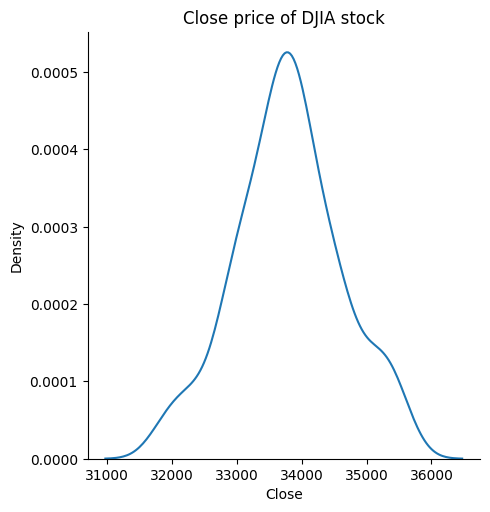

In [21]:
sns.displot(data=djia,x='Close', kind='kde')
plt.title("Close price of DJIA stock")
plt.show()

## Boxplot
Box plots are used to show distributions of numeric data values, especially when comparing them between multiple groups.
General information about of a group of data's symmetry, skew, variance, and outliers.

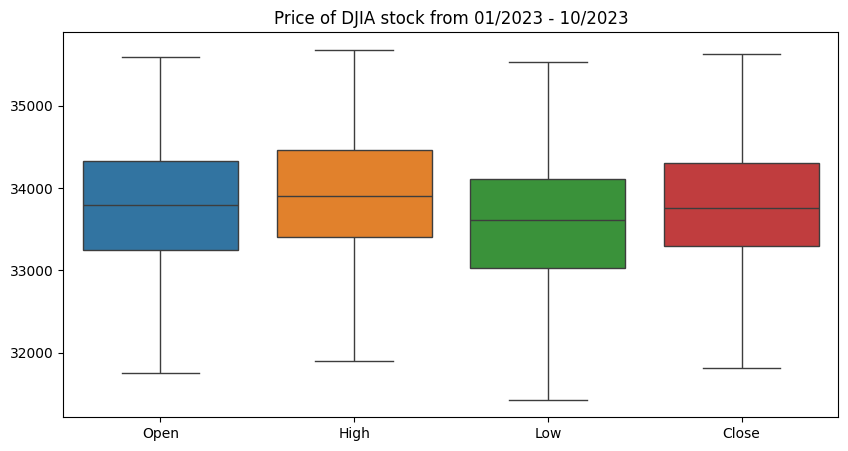

In [23]:
#Draw barplot for open,close,high,low price
plt.figure(figsize=(10,5))
sns.boxplot(data=djia.iloc[:,:-2])
plt.title("Price of DJIA stock from 01/2023 - 10/2023")
plt.show()

## Regression plot - Residual plot
Regression analysis identifies a regression line. The regression line shows how much and in what direction the response variable changes when the explanatory variable changes

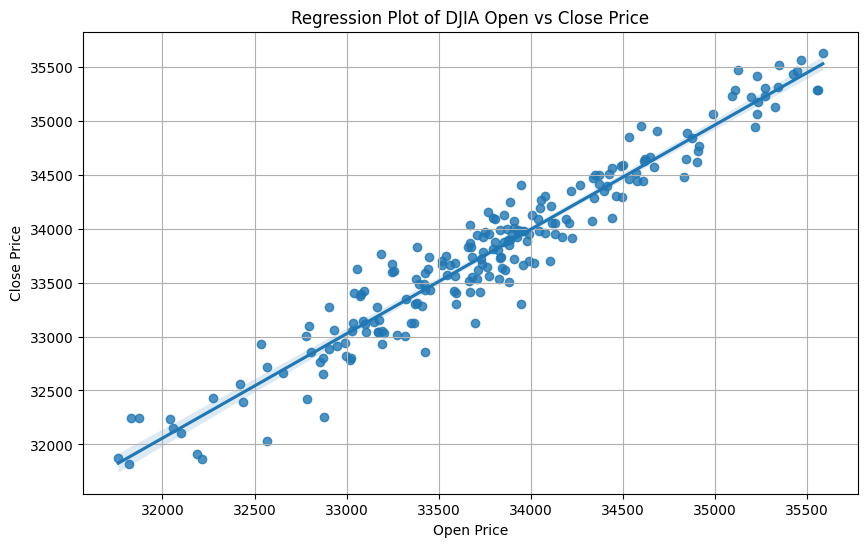

In [26]:
#Draw regression plot of 2 variables: 'Open' and 'Close'
plt.figure(figsize=(10,6))
sns.regplot(data=djia, x = 'Open', y = 'Close')
plt.title("Regression Plot of DJIA Open vs Close Price")
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

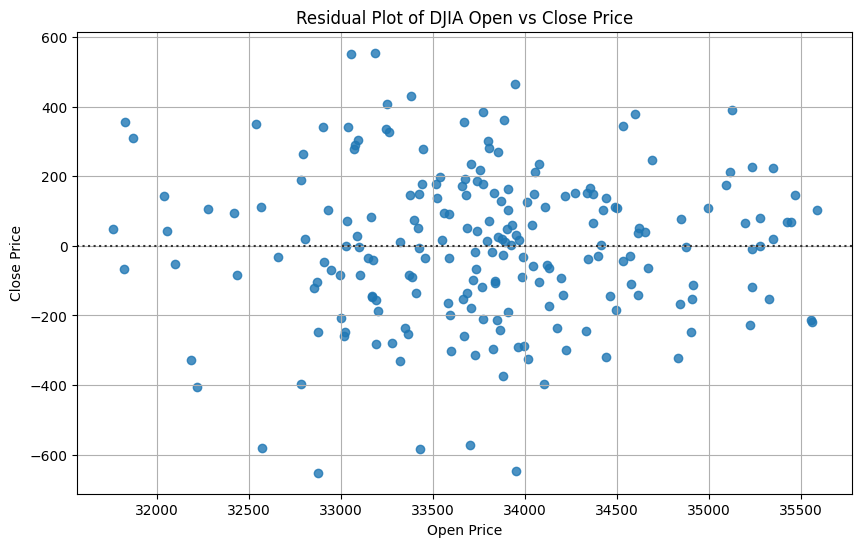

In [27]:
# Residual plot shows the difference between observed data values ​​and values ​​predicted by the regression model
plt.figure(figsize=(10,6))
sns.residplot(data = djia, x = 'Open', y = 'Close')
plt.title('Residual Plot of DJIA Open vs Close Price')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

## Barplot

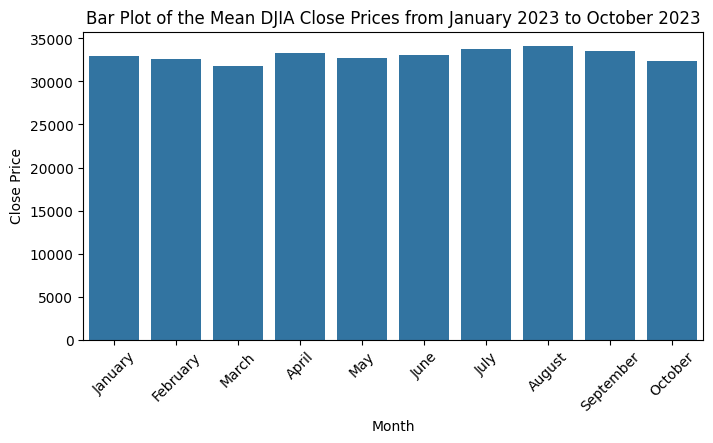

In [28]:
plt.figure(figsize=(8,4))
sns.barplot(djia, x='Month', y='Close', errorbar=None,estimator=min)
plt.title('Bar Plot of the Mean DJIA Close Prices from January 2023 to October 2023')
plt.ylabel('Close Price')
plt.xticks(rotation = 45)
plt.show()

## Countplot
The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable.

In [31]:
df = djia.Month.value_counts()
df.index

Index(['March', 'August', 'May', 'October', 'June', 'January', 'July',
       'September', 'February', 'April'],
      dtype='object', name='Month')

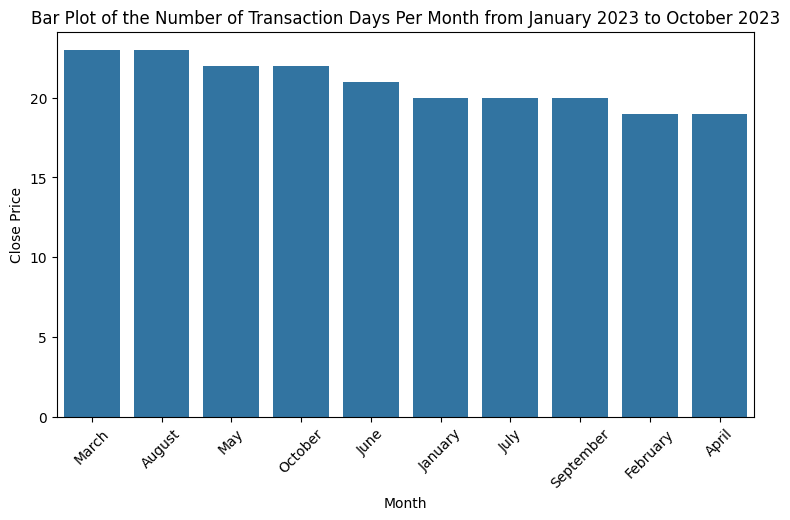

In [30]:
plt.figure(figsize=(9,5))
sns.countplot(djia,x = 'Month', order=djia.Month.value_counts().index)
plt.title('Bar Plot of the Number of Transaction Days Per Month from January 2023 to October 2023')
plt.ylabel('Close Price')
plt.xticks(rotation = 45)
plt.show()

## Heatmap
Heatmaps are used to show relationships between two variables, one plotted on each axis.

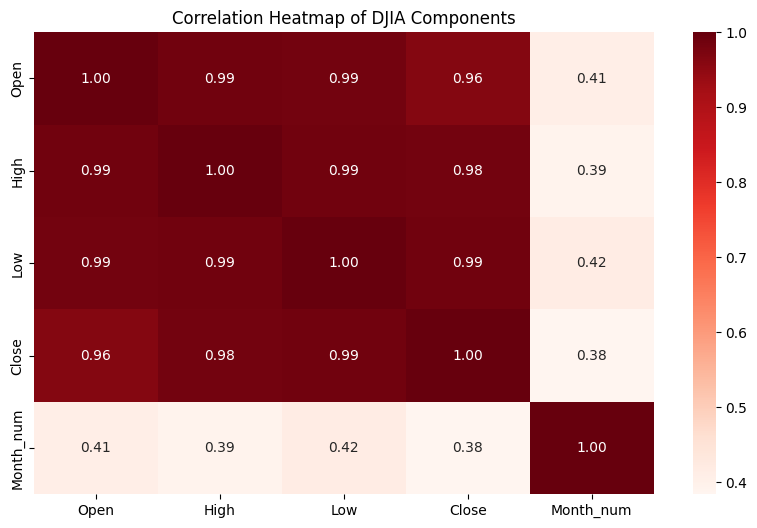

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(djia.corr(numeric_only=True), annot=True, fmt=".2f", cmap="Reds",cbar=True)
plt.title("Correlation Heatmap of DJIA Components")
plt.show()

Styles are configged in seaborn and draw in one frame
Syntax of subplot: plt.subplot(nrows, ncols, index)

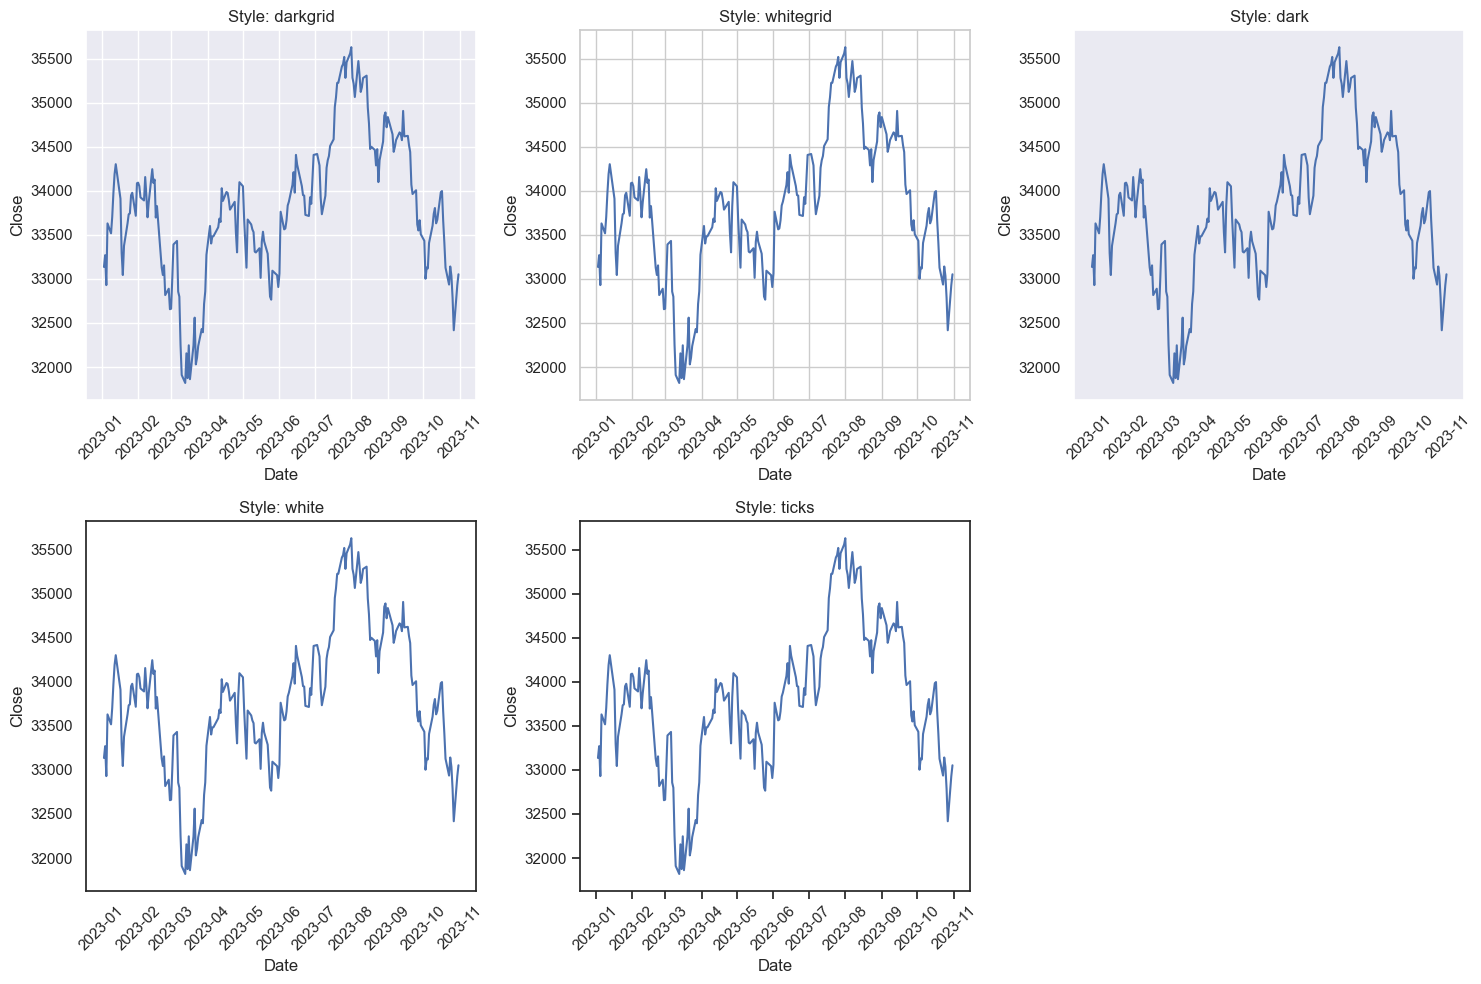

In [36]:
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
plt.figure(figsize=(15, 10))
for idx, style in enumerate(styles, start=1):
    sns.set_style(style)
    plt.subplot(2, 3, idx)
    sns.lineplot(x='Date', y='Close', data=djia)
    plt.xticks(rotation=45)  
    plt.title(f'Style: {style}')
plt.tight_layout()
plt.show()

# Reset to default style
# sns.set()